In [3]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

file_name = "../data/ATLAS/data_A.1lep.small.root"
file = uproot.open(file_name)

In [9]:
tree = b'mini;1'
branches = [ b'lep_pt', b'met_et',b'lep_phi',b'met_phi']
kins_1lep = {}
for branch in branches:
    kins_1lep[branch] = file[tree].array(branch)

In [8]:
def make_fig(xTitle="xTitle",yTitle="yTitle"):
    fig = plt.figure(figsize=(15,10))

    ax = plt.gca()
    ax.set_prop_cycle(color=['#002BFF','#A15FFF','#FF0061','#FF8913'])
    ax.set_xlabel(xTitle,fontsize=26,labelpad=6)
    ax.set_ylabel(yTitle,fontsize=26)
    ax.tick_params(labelsize=18, direction='out', length=8, width=2)
    ax.yaxis.offsetText.set_fontsize(18)
    ax.xaxis.labelpad = 15
    ax.yaxis.labelpad = 15
    ax.tick_params(axis='both', which='major', labelsize=25)
    
    return fig, ax

In [33]:
GeVperMeV = 1./1000
kins_1lep[b'dphi'] = np.minimum(abs(kins_1lep[b'lep_phi']-kins_1lep[b'met_phi']),np.pi*2-kins_1lep[b'lep_phi']+kins_1lep[b'met_phi'])
kins_1lep[b'mT'] = np.sqrt(2*kins_1lep[b'lep_pt']*kins_1lep[b'met_et']*(1-np.cos(kins_1lep[b'dphi'])))

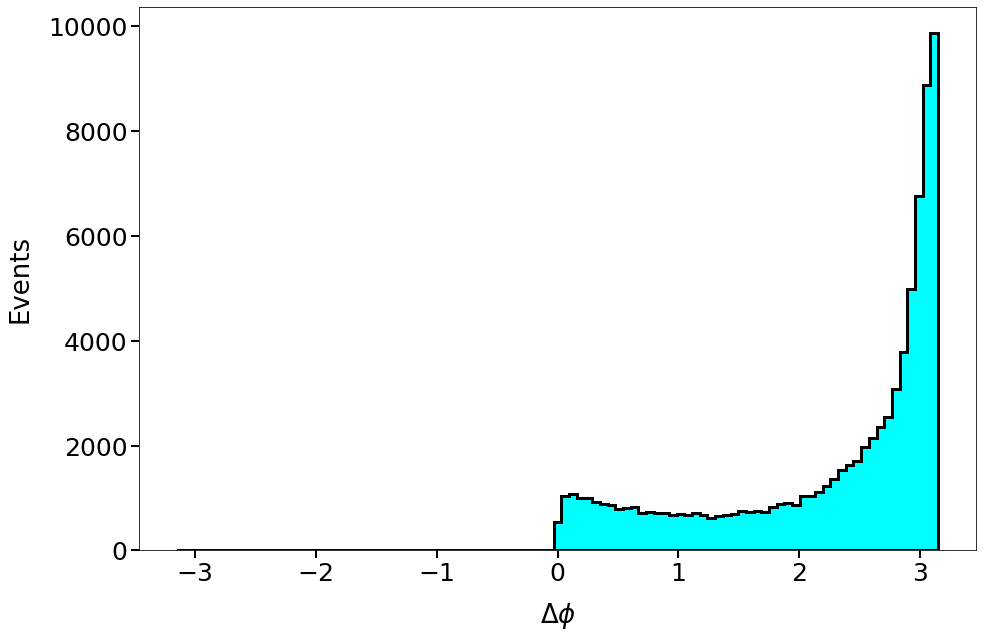

In [38]:
fig, ax = make_fig(xTitle="$\Delta\phi$",yTitle="Events")

n, bins, patches = ax.hist(kins_1lep[b'dphi'].flatten(), np.linspace(-3.15,3.15,100),linewidth=3,histtype='stepfilled',facecolor='aqua',edgecolor="black",linestyle='-')

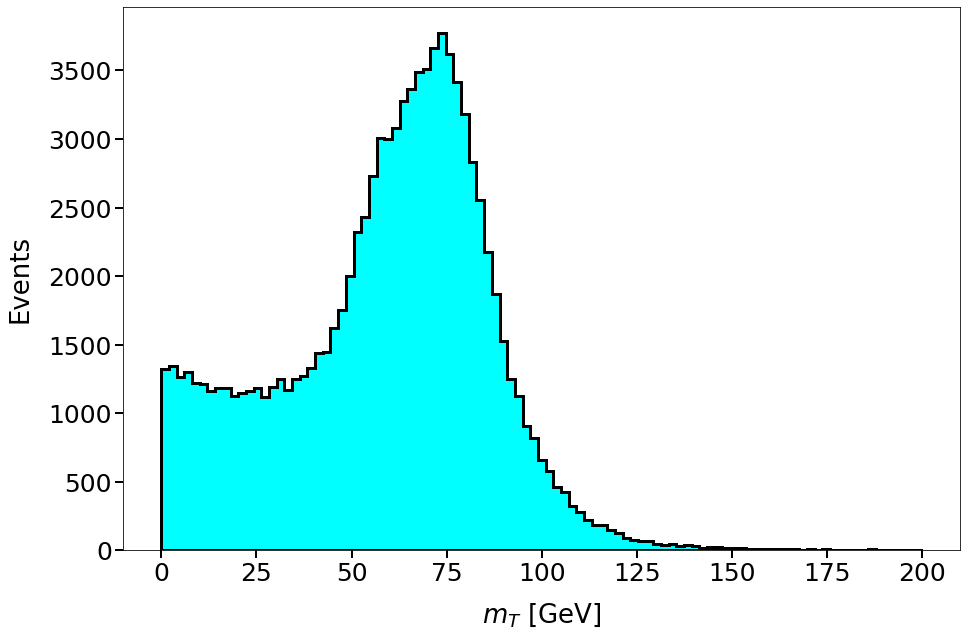

In [37]:
fig, ax = make_fig(xTitle="$m_T$ [GeV]",yTitle="Events")

n, bins, patches = ax.hist(kins_1lep[b'mT'].flatten()*GeVperMeV, np.linspace(0,200,100),linewidth=3,histtype='stepfilled',facecolor='aqua',edgecolor="black",linestyle='-')